# U.S. Medical Insurance Costs

1. Find out the average age of the patients in the dataset.
2. Analyze where a majority of the individuals are from.
3. Look at the different costs between smokers vs. non-smokers.
 * What is average age of smoking patients
 * How much smokers among all patients
4. Figure out what the average age is for someone who has at least one child in this dataset.
 * Find how much parents in dataset (people, having at least one child), find statisc of numbers of children
6. Analyze bmi vs cost and bmi vs age


0. Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('insurance.csv')


In [3]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


1.Find out the average age of the patients in the dataset.

Average age of the patients is:

In [8]:
print(np.average(df.age))

39.20702541106129


In [15]:
print('Age of the patients is between : {} and {}. While average is {}'.format(df.age.min(),df.age.max(),round(np.average(df.age))))

Age of the patients is between : 18 and 64. While average is 39


2. Analyze where a majority of the individuals are from.

In [33]:
region = df.groupby('region')['age'].count()
print(region)

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: age, dtype: int64


In [35]:
region_name = ['North East','North West','South East','South West']

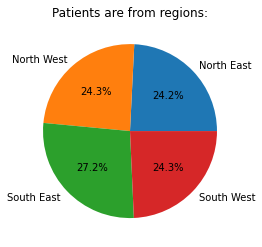

In [41]:
plt.pie(region, labels = region_name,autopct='%1.1f%%')
plt.title('Patients are from regions:')
plt.show()

3.Look at the different costs between smokers vs. non-smokers.

What is average age of smoking patients.

How much smokers among all patients.

In [50]:
smokers = df[df['smoker']=='yes']
nonsmokers = df[df['smoker']=='no']


In [51]:
smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [69]:
cost_sm = np.average(smokers.charges)
cost_nsm = np.average(nonsmokers.charges)
print('Average cost of insurance  for smokers is {}$, while it is {}$ for non smoking people.\nSo difference is {}$.\
      And it is in {} times more expencive for smokers'
      .format(round(cost_sm),round(cost_nsm),round(cost_sm-cost_nsm),round(cost_sm/cost_nsm)))
print('While there is {:.1%} people that smokes in our dataset.'.format(len(smokers)/len(df)))


Average cost of insurance  for smokers is 32050$, while it is 8434$ for non smoking people.
So difference is 23616$.      And it is in 4 times more expencive for smokers
While there is 20.5% people that smokes in our dataset.


In [ ]:
print(np.average(smokers.age))

4. Figure out what the average age is for someone who has at least one child in this dataset.
Find how much parents in dataset (people, having at least one child), find statisc of numbers of children.

In [72]:
parents = df[df['children']!=0]

In [73]:
print(parents.head())

   age     sex    bmi  children smoker     region    charges
1   18    male  33.77         1     no  southeast  1725.5523
2   28    male  33.00         3     no  southeast  4449.4620
6   46  female  33.44         1     no  southeast  8240.5896
7   37  female  27.74         3     no  northwest  7281.5056
8   37    male  29.83         2     no  northeast  6406.4107


In [74]:
print('There is {:.1%} people that have kids in our dataset.'.format(len(parents)/len(df)))

There is 57.1% people that have kids in our dataset.


In [85]:
print(np.average(parents.age))

39.78010471204188


In [98]:
print('Average age is {:.1f} for parents, {:.1f} if they have 1 child, {:.1f} - 2 children, 3: {:.1f}, 4: {:.1f}, 5:{:.1f}'
      .format(np.average(parents.age), np.average(parents[parents['children']==1].age),np.average(parents[parents['children']==2].age),\
             np.average(parents[parents['children']==3].age),np.average(parents[parents['children']==4].age),np.average(parents[parents['children']==5].age)))


Average age is 39.8 for parents, 39.5 if they have 1 child, 39.4 - 2 children, 3: 41.6, 4: 39.0, 5:35.6


In [31]:
have_children = df.groupby(['children']).count().age

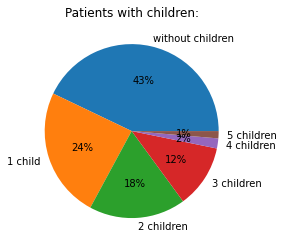

In [32]:
plt.pie(have_children, labels = ['without children','1 child','2 children','3 children','4 children','5 children'],autopct='%1.f%%')
plt.title('Patients with children:')
plt.show()

5. Analyze bmi vs cost and bmi vs age


In [27]:
df_bmi20 = df[df['bmi']<=20]
df_bmi30 = df[(df['bmi']<=30)& (df['bmi']>20)]
df_bmi40 = df[(df['bmi']<=40)& (df['bmi']>30)]
df_bmi50 = df[(df['bmi']<=50)& (df['bmi']>40)]

df_bmi60 = df[(df['bmi']>50)]

In [114]:
print(df_bmi20.head())

     age     sex     bmi  children smoker     region      charges
28    23    male  17.385         1     no  northwest   2775.19215
98    56    male  19.950         0    yes  northeast  22412.64850
99    38    male  19.300         0    yes  southwest  15820.69900
128   32  female  17.765         2    yes  northwest  32734.18630
169   27    male  18.905         3     no  northeast   4827.90495


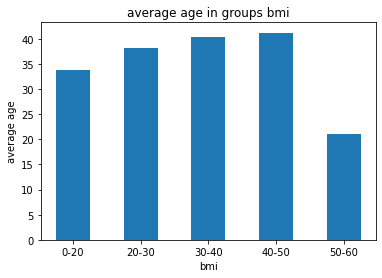

In [29]:
ax = plt.subplot()
plt.bar([20,30,40,50,60],[np.average(df_bmi20.age),np.average(df_bmi30.age),np.average(df_bmi40.age),np.average(df_bmi50.age),np.average(df_bmi60.age)],width = 5)
plt.title('average age in groups bmi')
plt.xlabel('bmi')
plt.ylabel('average age')
ax.set_xticks([20,30,40,50,60])
ax.set_xticklabels(['0-20','20-30','30-40','40-50','50-60'])
plt.show()

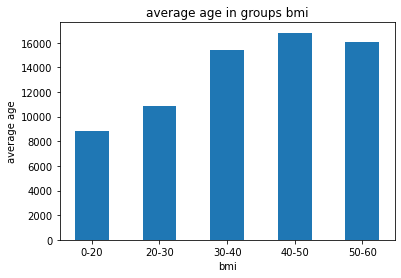

In [28]:
ax = plt.subplot()
plt.bar([20,30,40,50,60],[np.average(df_bmi20.charges),np.average(df_bmi30.charges),np.average(df_bmi40.charges),np.average(df_bmi50.charges),np.average(df_bmi60.charges)],width = 5)
plt.title('average cost in groups bmi')
plt.xlabel('bmi')
plt.ylabel('average cost')
ax.set_xticks([20,30,40,50,60])
ax.set_xticklabels(['0-20','20-30','30-40','40-50','50-60'])
plt.show()